In [3]:
import pandas as pd
import matplotlib.pyplot as plt

This notebook pulls data from the nwp csv files (one file per each run with 48 timesteps) and the t2_obs.csv (one file with 786 timesteps) 

please change the filename,station_id, start_time, end_time, data, accordingly

In [4]:
#open obs_t2.csv and set the dateindex starting with 28/07 1600 (UTC)
filename = "/Users/nasoohismail/T2_prob_nowcast_pysteps/data/obs/obs_t2.csv"
df = pd.read_csv(filename)
start_datetime = pd.to_datetime('2020-07-28 16:00') #convert 2020/07/30 00:00 to UTC = 2020/07/28 16:00
end_datetime = start_datetime + pd.DateOffset(hours=767)
datetime_index = pd.date_range(start=start_datetime, end=end_datetime, freq='H')
df.set_index(datetime_index, inplace=True)

In [5]:
# Get the column names (station IDs) and Choose a specific station and duration
station_ids = df.columns[1:]
station_id = "54638"
start_time = pd.to_datetime("2020-08-03 00:00")
end_time = pd.to_datetime("2020-08-05 00:00")

# Get the temperature data for the chosen station
temperatures = df[station_id].loc[start_time:end_time]

In [6]:
#open nwp csv data file from folder, and get the date index in the csv file
data = pd.read_csv('/Users/nasoohismail/T2_prob_nowcast_pysteps/data/nwp/202008030000_t2_nwp.csv')

# Extract the datetime column and the desired station's temperature column
datetime_column = pd.to_datetime(data['valid_time'])

# Extract the temperature column for the desired station
temperature_column = data[station_id]

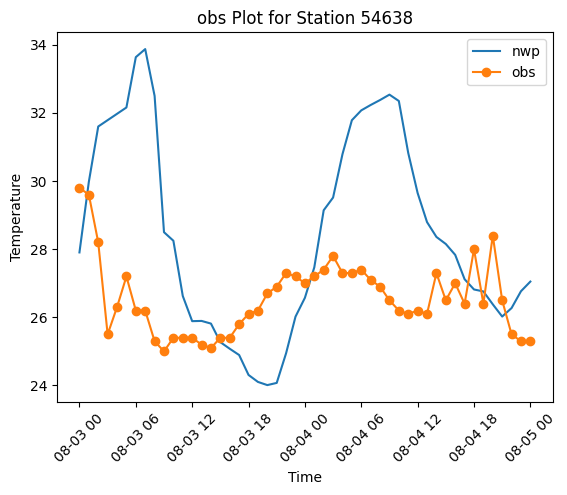

In [7]:
# Create the plot for the spefic station / duration

plt.plot(datetime_column, temperature_column, label='nwp')
plt.title(f'Nwp Plot for Station {station_id}')
plt.plot(temperatures.index, temperatures.values, label='obs', marker = 'o')
plt.title(f'obs Plot for Station {station_id}')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.xticks(rotation=45)
plt.show()